# Isolating inelastic signal

- Task: histogram and find signal
	- histogram
	- img
	- spatial projection
	- energy-dispersive projection
    
As examples we use three OF runs [001,002,003], two 1F runs [004,005], two 2F runs [006,007], and one 3F run [008].

## Isolating inelastic signal

foo

## Image of elastic, inelastic, and artifact signal

bar

## Finding region-of-interest (ROI)

foobar

```{note}
Check observables (first moments) to established values to ensure that manual detector geometry works well.
```



```{note}
Call functions with 'bt' argument, such that all can easily be expanded/adapted to other experiments. Both for us and to make it clear where beamtim-specific parameters/settings enter.

Examples:
- extract
- background
- parameters
- interpolate
- detector correction (make img)
```


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

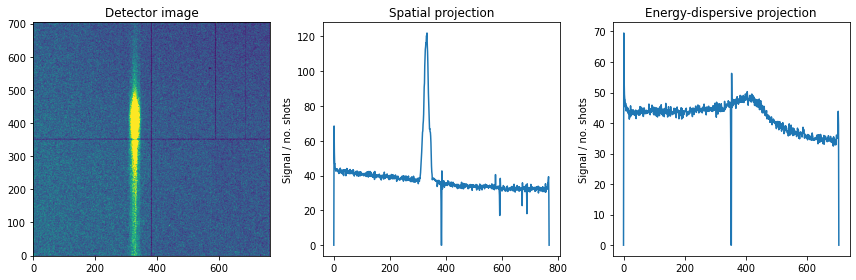

In [2]:
def load_run(run):
    fh = h5py.File('../../example_data/run-%03d.h5' %run, 'r')
    x = fh['x'][()]; y = fh['y'][()]
    adu = fh['adu'][()]; ndroplets = fh['ndroplets'][()]
    gmd = fh['pulse_energy'][()]; fh.close()
    return x,y,adu,ndroplets,gmd

def extract(runs):
    x = []; y = []; adu = []; ndroplets = []; gmd = []
    for run in runs:
            tmp_x,tmp_y,tmp_adu,tmp_ndroplets,tmp_gmd = load_run(run)
            x.append(tmp_x); y.append(tmp_y); adu.append(tmp_adu)
            ndroplets.append(tmp_ndroplets); gmd.append(tmp_gmd)
    return np.concatenate(x),np.concatenate(y),np.concatenate(adu),np.concatenate(ndroplets),np.concatenate(gmd)

x,y,adu,ndroplets,gmd = extract([1]) # calibration data
fig = plt.figure(figsize=(12,4))
plt.subplot(131); plt.title('Detector image')
img, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(705), np.arange(769)],weights=adu)
vmin, vmax = np.percentile(img, [1, 99]) # make colormap only cover the 1-99 percentile (aesthetics)
plt.imshow(img, origin='lower',vmin=vmin, vmax=vmax,aspect='auto')
plt.subplot(132); plt.title('Spatial projection')
proj = np.sum(img, axis=0); plt.plot(proj/len(ndroplets))
plt.ylabel('Signal / no. shots')
plt.subplot(133); plt.title('Energy-dispersive projection')
proj = np.sum(img, axis=1); plt.plot(proj/len(ndroplets))
plt.ylabel('Signal / no. shots')
plt.tight_layout()
plt.show()

In [3]:
def manual(img):
    new_img = []
    I = 0
    for i in np.arange(709):
        if (i > 352) and (i < 358):
            new_img.append(np.zeros(len(img[0])+5))
        else:
            tmp = img[I]
            for j in np.arange(5):
                tmp = np.insert(tmp, 384, 0.0)
            new_img.append(tmp)
            I += 1
    return new_img

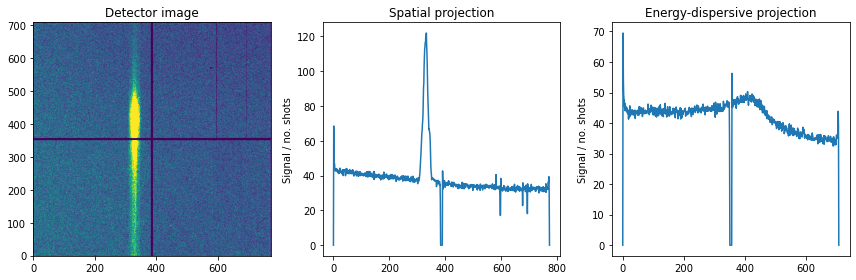

In [4]:
fig = plt.figure(figsize=(12,4))
plt.subplot(131); plt.title('Detector image')
img, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(705), np.arange(769)],weights=adu)
img = manual(img)
vmin, vmax = np.percentile(img, [1, 99])
plt.imshow(img, origin='lower',vmin=vmin, vmax=vmax,aspect='auto')
plt.subplot(132); plt.title('Spatial projection')
proj = np.sum(img, axis=0); plt.plot(proj/len(ndroplets))
plt.ylabel('Signal / no. shots')
plt.subplot(133); plt.title('Energy-dispersive projection')
proj = np.sum(img, axis=1); plt.plot(proj/len(ndroplets))
plt.ylabel('Signal / no. shots')
plt.tight_layout()
plt.show()

/home/thomas/Notebook/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


/home/thomas/Notebook/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


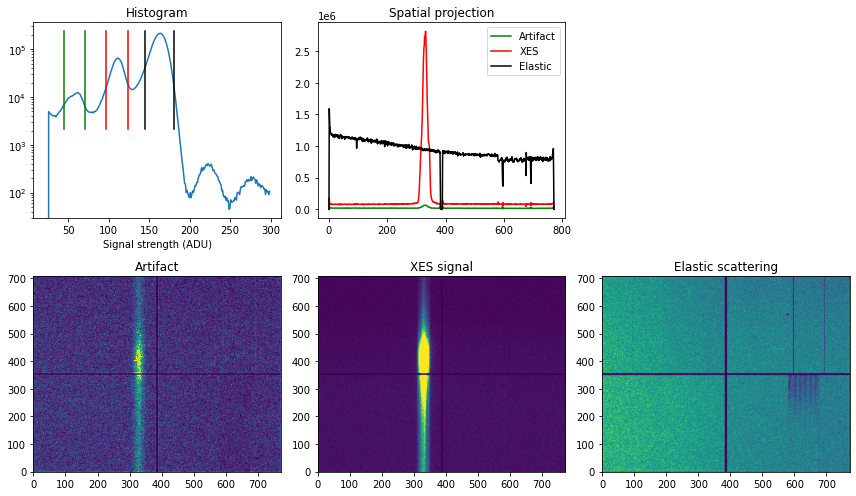

In [5]:

def create_img(x,y,adu,adu_int,weight):
    ind, = np.where((adu >= adu_int[0]) & (adu <= adu_int[1]))
    if weight == True:
        img, xedges, yedges = np.histogram2d(x[ind], y[ind], bins=[np.arange(705), np.arange(769)],weights=adu[ind])
    elif weight == False:
        img, xedges, yedges = np.histogram2d(x[ind], y[ind], bins=[np.arange(705), np.arange(769)])
    vmin, vmax = np.percentile(img, [1, 99])
    img = manual(img)
    return img,vmin,vmax

###############################
# histogram and image of PS2 0F
###############################
# signal regions for artifact, XES, and elastic scattering
adu_art = [ 45.0, 70.0]
adu_xes = [ 97.0,123.0]
adu_sca = [145.0,180.0]
runs_0F = [1,2,3]
x,y,adu,ndroplets,gmd = extract(runs_0F)
fig = plt.figure(figsize=(12,7))
################
plt.subplot(231); plt.title('Histogram')
histY, histX = np.histogram(adu,bins = np.arange(20,300))
plt.plot(histX[1:]-0.5,histY)
ylims = [0.01*np.max(histY),1.1*np.max(histY)]
plt.plot([adu_art[0],adu_art[0]],ylims,'-',color='g');plt.plot([adu_art[1],adu_art[1]],ylims,'-',color='g')
plt.plot([adu_xes[0],adu_xes[0]],ylims,'-',color='r');plt.plot([adu_xes[1],adu_xes[1]],ylims,'-',color='r')
plt.plot([adu_sca[0],adu_sca[0]],ylims,'-',color='k');plt.plot([adu_sca[1],adu_sca[1]],ylims,'-',color='k')
plt.yscale('log'); plt.xlabel('Signal strength (ADU)')
################
plt.subplot(234); plt.title('Artifact')
img,vmin,vmax = create_img(x,y,adu,adu_art,True)
plt.imshow(img, origin='lower',vmin=vmin, vmax=vmax,aspect='auto')
plt.subplot(232); plt.title('Spatial projection')
plt.plot(np.sum(img, axis=0),color='g')
################
plt.subplot(235); plt.title('XES signal')
img,vmin,vmax = create_img(x,y,adu,adu_xes,True)
plt.imshow(img, origin='lower',vmin=vmin, vmax=vmax,aspect='auto')
plt.subplot(232)
plt.plot(np.sum(img, axis=0),color='r')
################
plt.subplot(236); plt.title('Elastic scattering')
img,vmin,vmax = create_img(x,y,adu,adu_sca,True)
plt.imshow(img, origin='lower',vmin=vmin, vmax=vmax,aspect='auto')
plt.subplot(232)
plt.plot(np.sum(img, axis=0),color='k')
plt.legend(('Artifact','XES','Elastic'),loc='upper right',fontsize=10)
################
plt.tight_layout()
plt.show()

In [6]:
# print corresponding
xest.function?

Object `xest.function` not found.


In [7]:
# use actual function